# BernieBot
Here's a simple program for generating Bernie Sanders speeches (to a first approximation). Using a large compilation of Bernie speeches (~40k words), we use a simple frequency analysis (count the total word distribution $P(w)$ and the one-word conditional distribution $P(w_{t+1} | w_t)$. Yup, it's a Markov chain.

We can random walk on this Markov chain and generate speeches. We can also get the entropy rate $h_\mu = \sum_w P(w) \sum_{w'} P(w'|w) \log (P(w'|w)) $ (assuming Bernie is in his stationary distribution).

In [339]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

speechfile = open("IdiomList.txt",'r')
a = speechfile.read().lower()
words = a.replace("\n\n"," ").split(' ')

In [340]:
gatsby = open("gatsby.txt",'r')
a = gatsby.read()
#gatsby_words = a.replace("\n", " ").replace("\"","").replace(".","").replace(",","").replace('--'," ").replace("\r", " ").replace("  ", " ").replace("  ", " ")
gatsby_words = a.lower().replace("\n", " ").replace("\"","").replace(".","").replace(",","").replace('--'," ").replace("\r", " ").replace("  ", " ").replace("  ", " ").split(' ')
gatsby_words = [ word for word in gatsby_words if "\'" not in word ]

In [341]:
words += words + gatsby_words[:1000]

In [342]:
print len(words), " words"
print len(set(words)), " unique words though"

8836  words
1574  unique words though


Build the word dictionary. 

In [175]:
n = 2
n_grams = list(set([ tuple(words[i:i+n]) for i in range(len(words)-n) ]))

loc = [ [ i for i in range(len(words)-n) if n_grams[j] == words[i:i+n] ] for j in range(len(n_grams)) ]

markov_chain = { n_grams[j]: ([ words[loc[j][i]+n] for i in range(len(loc[j])) ]) for j in range(len(n_grams)) }
n_gram_freq = [ len(loc[i]) for i in range(len(n_grams)) ]
n_gram_dist = np.array(n_gram_freq) / float(sum(n_gram_freq))

In [ ]:
plt.hist(n_gram_freq,bins=20)

In [ ]:
x = np.random.choice(range(len(n_grams)),p=n_gram_dist)
idiom = [] + n_grams[x]
idiom + [np.random.choice(markov_chain[tuple(n_grams[x])])]

for i in range(20):
    idiom += [np.random.choice(markov_chain[tuple(idiom[-2:])])]
idiom

In [343]:
n = 3
n_grams = list(set([ tuple(words[i:i+n]) for i in range(len(words)-n) ]))

markov_dict = {}
for i in range(len(n_grams)):
    if n_grams[i][0:n-1] in markov_dict:
        markov_dict[n_grams[i][0:n-1]] += [n_grams[i][-1]]
    else:
        markov_dict[n_grams[i][0:n-1]] = [n_grams[i][-1]]

n_gram_freq = [ len(markov_dict[key]) for key in markov_dict.keys() ]

(array([  3.70000000e+03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.30000000e+02,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   4.80000000e+01,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.50000000e+01,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+01,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.10000000e+01,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   4.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          4.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.00000000e+00,
        

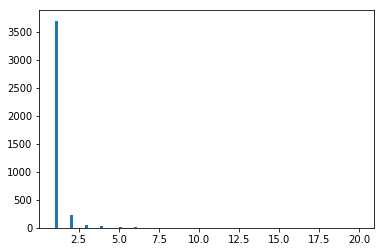

In [344]:
plt.hist(n_gram_freq,bins=100)

In [349]:
x = np.random.choice(range(len(n_grams)))
idiom = [] + list(n_grams[x])
idiom + [np.random.choice(list(markov_dict[n_grams[x][0:n-1]]))]

for i in range(25):
    idiom += [np.random.choice(markov_dict[tuple(idiom[-(n-1):])])]
' '.join(idiom)

"in the spring of twenty-two the practical thing was to find a way where there's muck there's brass while there's life there's hope whom the gods love die"